<a href="https://colab.research.google.com/github/Septiana2216/portofolio/blob/main/Septiana_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

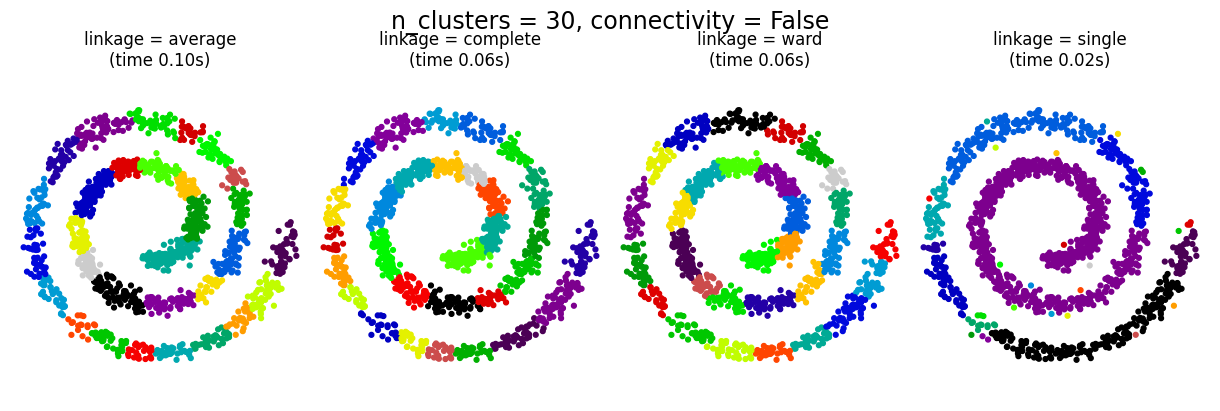

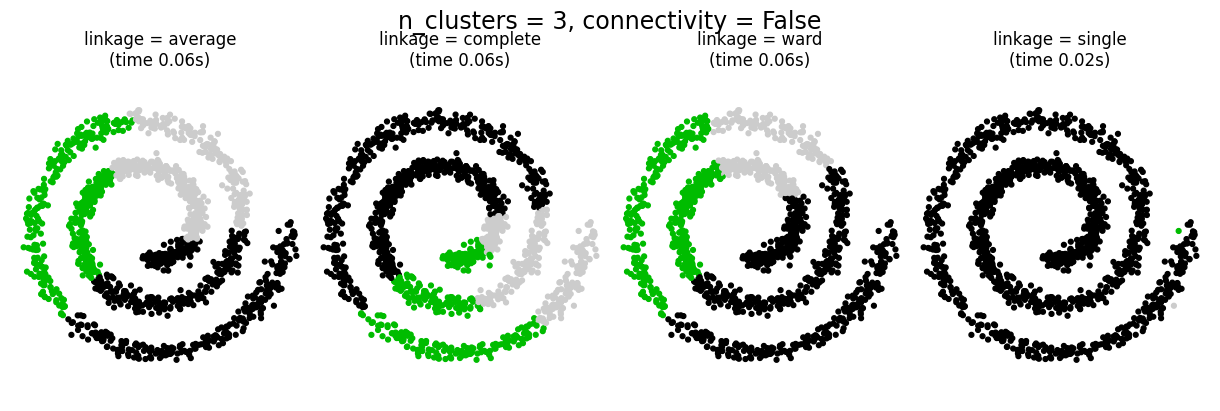

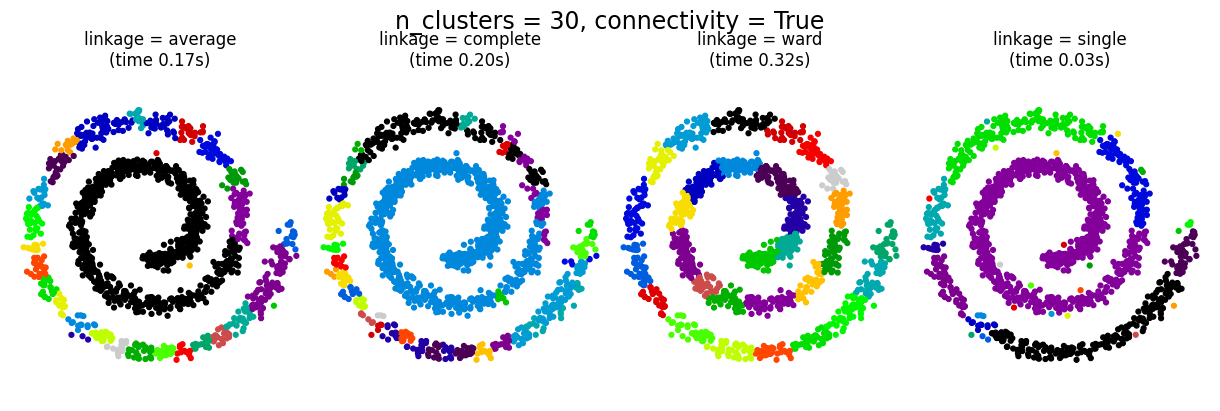

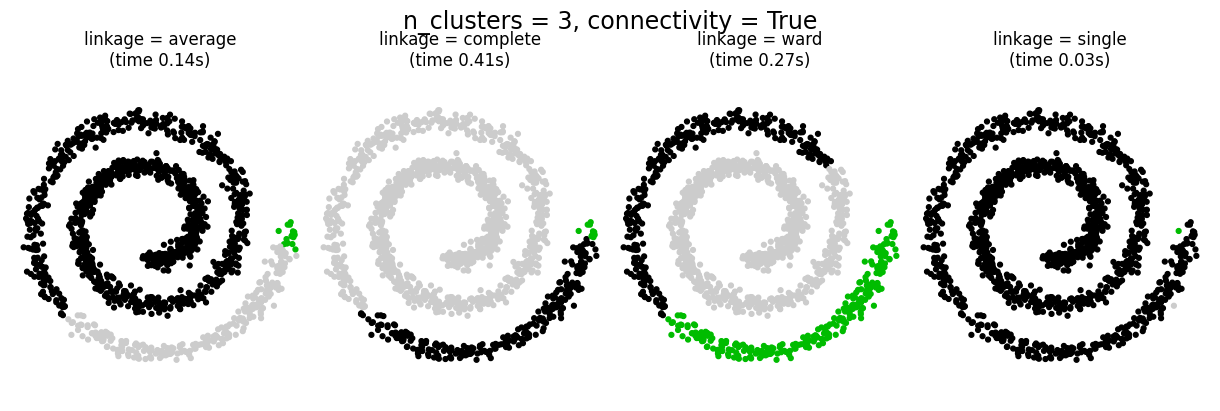

In [ ]:
# Authors: Septiana Istijabah
# SPDX-License-Identifier: BSD-3-Clause

import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# -----------------------------------------------------------------------------
# Generate sample data
# -----------------------------------------------------------------------------
n_samples = 1500
np.random.seed(0)

t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X = np.concatenate((x, y))
X += 0.7 * np.random.randn(2, n_samples)
X = X.T  # shape: (n_samples, 2)

# -----------------------------------------------------------------------------
# Build k-nearest-neighbors graph for optional connectivity constraint
# -----------------------------------------------------------------------------
knn_graph = kneighbors_graph(X, n_neighbors=30, include_self=False)

# -----------------------------------------------------------------------------
# Run clustering under various settings and plot the results
# -----------------------------------------------------------------------------
for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(12, 4))

        for index, linkage in enumerate(("average", "complete", "ward", "single"), start=1):
            plt.subplot(1, 4, index)

            model = AgglomerativeClustering(
                linkage=linkage,
                connectivity=connectivity,
                n_clusters=n_clusters,
            )

            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0

            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral, s=12)
            plt.title(
                f"linkage = {linkage}\n(time {elapsed_time:.2f}s)",
                verticalalignment="top",
            )
            plt.axis("equal")
            plt.axis("off")

        plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
        plt.suptitle(
            f"n_clusters = {n_clusters}, connectivity = {connectivity is not None}",
            fontsize=17,
        )

plt.show()